In [49]:
from nutil import *
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
%matplotlib notebook

In [4]:
cdm_cusp = Merger('/scratch/gpfs/chainje/merger/cdm/cuspySgr/raw-data.h5')
cdm_core = Merger('/scratch/gpfs/chainje/merger/cdm/core10Sgr/raw-data.h5')
sidm     = Merger('/scratch/gpfs/chainje/merger/sidm/core10/raw-data.h5')

<IPython.core.display.Javascript object>


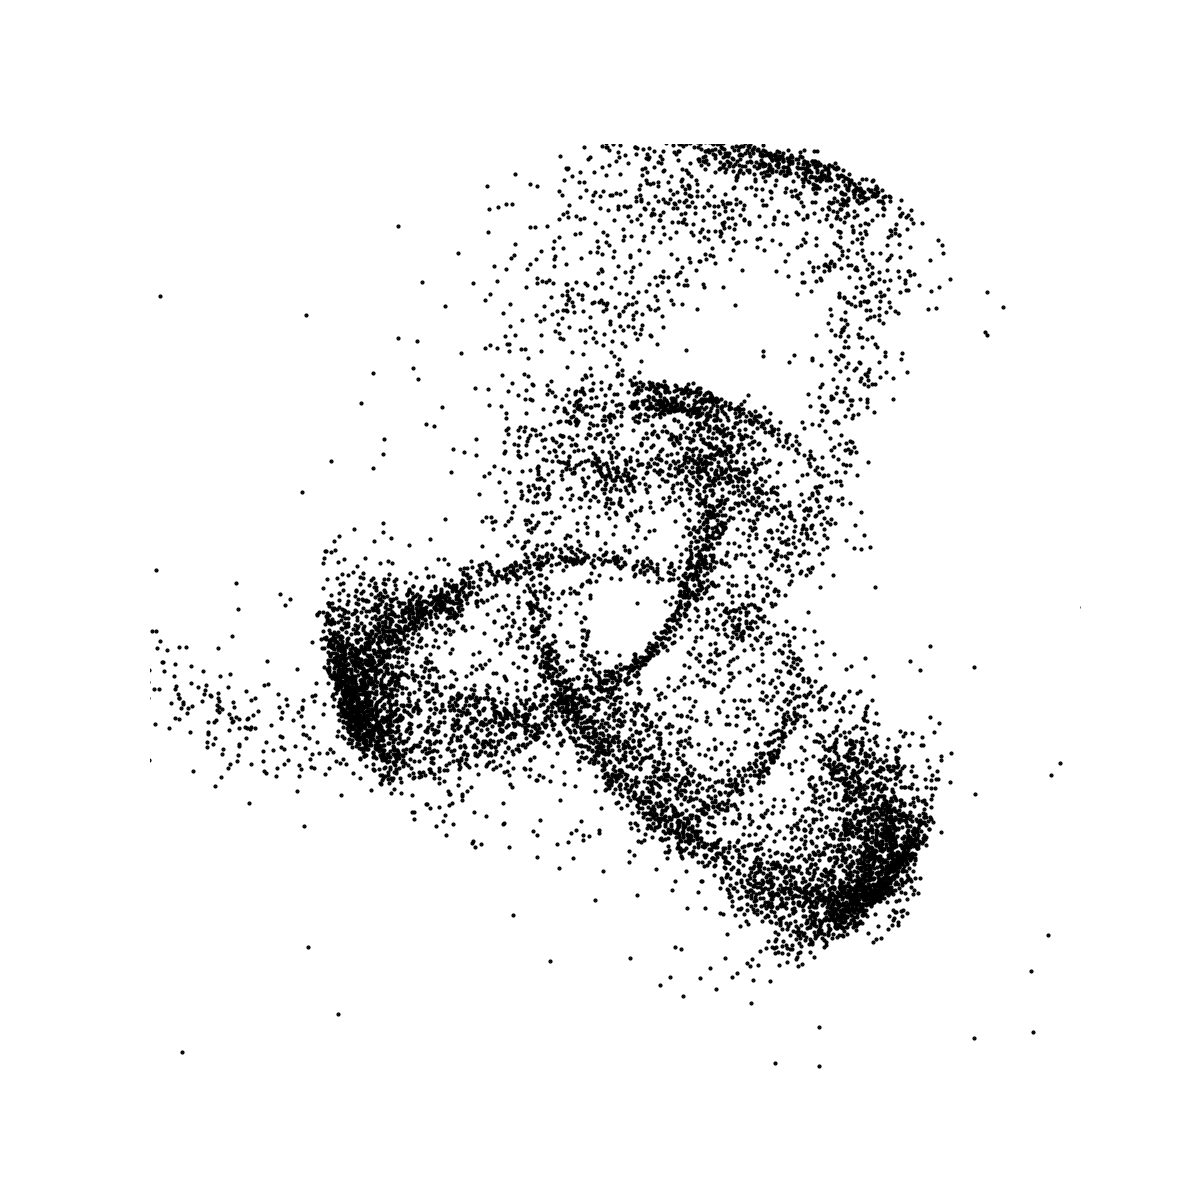

In [69]:
fig, ax = plt.subplots(figsize=(6,6))

pos = cdm_cusp.get_snap('sgr', 'star', 72)['pos']

ax.scatter(pos[:,0], pos[:,2], color='black', s=1, marker='.')

ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
# ax.set_xlabel('[kpc]')
# ax.set_ylabel('[kpc]')
ax.set_axis_off()

plt.show()

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

ccu, = ax[0].plot([], [], 'k.', markersize=0.5)
cco, = ax[1].plot([], [], 'k.', markersize=0.5)
sid, = ax[2].plot([], [], 'k.', markersize=0.5)

def init():
    for a in ax:
        a.set_xlim(-200, 200)
        a.set_ylim(-200, 200)
        a.set_xlabel('[kpc]')
        a.set_ylabel('[kpc]')
    ax[0].set_title('CDM/cusp')
    ax[1].set_title('CDM/core')
    ax[2].set_title('SIDM')

def update(frame):
    pos = cdm_cusp.get_snap('sgr', 'star', frame)['pos']
    ccu.set_data(pos[:,0], pos[:,2])
    pos = cdm_core.get_snap('sgr', 'star', frame)['pos']
    cco.set_data(pos[:,0], pos[:,2])
    pos = sidm.get_snap('sgr', 'star', frame)['pos']
    sid.set_data(pos[:,0], pos[:,2])
    
    fig.suptitle(f'Stellar particles, {cdm_cusp.get_time(frame):.2f} Gyr', x=0.52)
    return fig,
    
ani = FuncAnimation(fig, update, range(len(cdm_cusp)), init_func=init)
ani.save("presentation_plots/stars.gif", writer=PillowWriter(fps=5))
plt.show()

<IPython.core.display.Javascript object>

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

ccu, = ax[0].plot([], [], 'k.', markersize=0.5)
cco, = ax[1].plot([], [], 'k.', markersize=0.5)
sid, = ax[2].plot([], [], 'k.', markersize=0.5)

def init():
    for a in ax:
        a.set_xlim(-200, 200)
        a.set_ylim(-200, 200)
        a.set_xlabel('[kpc]')
        a.set_ylabel('[kpc]')
    ax[0].set_title('CDM/cusp')
    ax[1].set_title('CDM/core')
    ax[2].set_title('SIDM')

def update(frame):
    pos = cdm_cusp.get_snap('sgr', 'dark', frame)['pos']
    ccu.set_data(pos[:,0], pos[:,2])
    pos = cdm_core.get_snap('sgr', 'dark', frame)['pos']
    cco.set_data(pos[:,0], pos[:,2])
    pos = sidm.get_snap('sgr', 'dark', frame)['pos']
    sid.set_data(pos[:,0], pos[:,2])
    
    fig.suptitle(f'Dark matter particles, {cdm_cusp.get_time(frame):.2f} Gyr', x=0.52)
    return fig,
    
ani = FuncAnimation(fig, update, range(len(cdm_cusp)), init_func=init)
ani.save("presentation_plots/darks.gif", writer=PillowWriter(fps=5))
plt.show()

<IPython.core.display.Javascript object>

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

star_kw = {'color': '#992f2f', 'markersize': 0.5, 'alpha': 0.8}
dark_kw = {'color': '#000000', 'markersize': 0.5, 'alpha': 0.8}

darks1, = ax[0].plot([], [], '.', **dark_kw)
stars1, = ax[0].plot([], [], '.', **star_kw)

darks2, = ax[1].plot([], [], '.', **dark_kw)
stars2, = ax[1].plot([], [], '.', **star_kw)

darks3, = ax[2].plot([], [], '.', **dark_kw)
stars3, = ax[2].plot([], [], '.', **star_kw)


def init():
    for a in ax:
        a.set_xlim(-200, 200)
        a.set_ylim(-200, 200)
        a.set_xlabel('[kpc]')
        a.set_ylabel('[kpc]')
    ax[0].set_title('CDM/cusp')
    ax[1].set_title('CDM/core')
    ax[2].set_title('SIDM')

def update(frame):
    pos = cdm_cusp.get_snap('sgr', 'star', frame)['pos']
    stars1.set_data(pos[:,0], pos[:,2])
    
    pos = cdm_core.get_snap('sgr', 'star', frame)['pos']
    stars2.set_data(pos[:,0], pos[:,2])
    
    pos = sidm.get_snap('sgr', 'star', frame)['pos']
    stars3.set_data(pos[:,0], pos[:,2])
    
    pos = cdm_cusp.get_snap('sgr', 'dark', frame)['pos']
    darks1.set_data(pos[:,0], pos[:,2])
    
    pos = cdm_core.get_snap('sgr', 'dark', frame)['pos']
    darks2.set_data(pos[:,0], pos[:,2])
    
    pos = sidm.get_snap('sgr', 'dark', frame)['pos']
    darks3.set_data(pos[:,0], pos[:,2])
    
    fig.suptitle(f'{cdm_cusp.get_time(frame):.2f} Gyr', x=0.52)
    return fig,
    
ani = FuncAnimation(fig, update, range(len(cdm_cusp)), init_func=init)
ani.save("presentation_plots/both.gif", writer=PillowWriter(fps=5))
plt.show()

<IPython.core.display.Javascript object>